In [200]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st

df = pd.read_csv(r'C:\Users\vborg\Documents\IronHack\Class\Week3\Project\MyProject\nobelprize_data_analyze\Data\nobel_prizes.csv')

In [174]:
print(df.head())

   Award Year    Category             Category Full Name Date Awarded  \
0        1901   Chemistry   The Nobel Prize in Chemistry   1901-11-12   
1        1901  Literature  The Nobel Prize in Literature   1901-11-14   
2        1901       Peace          The Nobel Peace Prize   1901-12-10   
3        1901       Peace          The Nobel Peace Prize   1901-12-10   
4        1901     Physics     The Nobel Prize in Physics   1901-11-12   

                  Laureate Name              Known Name Gender  Birth Date  \
0  Jacobus Henricus van 't Hoff  Jacobus H. van 't Hoff   male  1852-08-30   
1               Sully Prudhomme         Sully Prudhomme   male  1839-03-16   
2             Jean Henry Dunant            Henry Dunant   male  1828-05-08   
3                Frédéric Passy          Frédéric Passy   male  1822-05-20   
4        Wilhelm Conrad Röntgen  Wilhelm Conrad Röntgen   male  1845-03-27   

  Birth Place    Birth Country Birth Continent  Identification  \
0   Rotterdam  the Netherl

In [175]:
print(df.isnull().sum())

Award Year                0
Category                  0
Category Full Name        0
Date Awarded              5
Laureate Name            30
Known Name               30
Gender                    0
Birth Date                0
Birth Place               0
Birth Country             0
Birth Continent           0
Identification            0
Motivation                0
Prize Amount              0
Prize Amount Adjusted     0
dtype: int64


In [176]:
print(df.describe())

        Award Year  Identification  Prize Amount  Prize Amount Adjusted
count  1000.000000     1000.000000  1.000000e+03           1.000000e+03
mean   1973.721000      509.099000  3.798566e+06           7.145778e+06
std      34.523195      298.130617  4.182204e+06           3.707564e+06
min    1901.000000        1.000000  1.149350e+05           2.692969e+06
25%    1949.750000      250.750000  1.717530e+05           3.490141e+06
50%    1979.000000      500.500000  8.000000e+05           5.938490e+06
75%    2003.000000      764.250000  8.000000e+06           1.047780e+07
max    2023.000000     1034.000000  1.100000e+07           1.392787e+07


In [177]:
print(df['Category'].value_counts())

Category
Physiology or Medicine    227
Physics                   225
Chemistry                 194
Peace                     141
Literature                120
Economic Sciences          93
Name: count, dtype: int64


In [178]:
print(df.groupby('Category')['Prize Amount'].mean())

Category
Chemistry                 3.973131e+06
Economic Sciences         6.493452e+06
Literature                2.752351e+06
Peace                     3.473289e+06
Physics                   3.772849e+06
Physiology or Medicine    3.325908e+06
Name: Prize Amount, dtype: float64


In [179]:
df['Prize Amount'] = df['Prize Amount'].replace('[^\d.]', '', regex=True).astype(float).astype(int)
df['Prize Amount Adjusted'] = df['Prize Amount Adjusted'].replace('[^\d.]', '', regex=True).astype(float).astype(int)

In [180]:
print(df.dtypes)

Award Year                int64
Category                 object
Category Full Name       object
Date Awarded             object
Laureate Name            object
Known Name               object
Gender                   object
Birth Date               object
Birth Place              object
Birth Country            object
Birth Continent          object
Identification            int64
Motivation               object
Prize Amount              int32
Prize Amount Adjusted     int32
dtype: object


In [181]:
print(df[['Prize Amount', 'Prize Amount Adjusted']].head())

   Prize Amount  Prize Amount Adjusted
0        150782                9704878
1        150782                9704878
2        150782                9704878
3        150782                9704878
4        150782                9704878


In [182]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"--- {column} ---")
    print(df[column].value_counts())
    print("\n")

--- Category ---
Category
Physiology or Medicine    227
Physics                   225
Chemistry                 194
Peace                     141
Literature                120
Economic Sciences          93
Name: count, dtype: int64


--- Category Full Name ---
Category Full Name
The Nobel Prize in Physiology or Medicine                                     227
The Nobel Prize in Physics                                                    225
The Nobel Prize in Chemistry                                                  194
The Nobel Peace Prize                                                         141
The Nobel Prize in Literature                                                 120
The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel     93
Name: count, dtype: int64


--- Date Awarded ---
Date Awarded
1946-11-14    7
2000-10-10    6
1926-11-11    6
1972-10-20    6
1986-10-15    6
             ..
2000-10-13    1
1983-10-27    1
1937-10-28    1
2001-10-11    1
1979-1

In [183]:
unknown_names = df[df['Gender'] == 'Unknown']
display(unknown_names)

,Award Year,Category,Category Full Name,Date Awarded,Laureate Name,Known Name,Gender,Birth Date,Birth Place,Birth Country,Birth Continent,Identification,Motivation,Prize Amount,Prize Amount Adjusted
23,1904,Peace,The Nobel Peace Prize,1904-12-10,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,467,for its striving in public law to develop peac...,140859,8799545
59,1910,Peace,The Nobel Peace Prize,1910-12-10,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,477,for acting as a link between the peace societi...,140703,8077113
89,1917,Peace,The Nobel Peace Prize,1917-12-10,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,482,for the efforts to take care of wounded soldie...,133823,4441251
199,1938,Peace,The Nobel Peace Prize,1938-11-17,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,503,for having carried on the work of Fridtjof Nan...,155077,5146618
213,1944,Peace,The Nobel Peace Prize,1945-11-12,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,482,for the great work it has performed during the...,121841,2843849
234,1947,Peace,The Nobel Peace Prize,1947-10-30,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,508,for their pioneering work in the international...,146115,3301577
235,1947,Peace,The Nobel Peace Prize,1947-10-30,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,509,for their pioneering work in the international...,146115,3301577
280,1954,Peace,The Nobel Peace Prize,1955-11-05,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,515,for its efforts to heal the wounds of war by p...,181647,2990839
345,1963,Peace,The Nobel Peace Prize,1963-10-10,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,482,for promoting the principles of the Geneva Con...,265000,3216343
346,1963,Peace,The Nobel Peace Prize,1963-10-10,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,523,for promoting the principles of the Geneva Con...,265000,3216343


In [184]:
df = df[df['Gender'] != 'Unknown']

In [185]:
awards_per_year = df['Award Year'].value_counts().sort_index()
print(awards_per_year)

total_prize_amount_per_year = df.groupby('Award Year')['Prize Amount'].sum()

Award Year
1901     6
1902     7
1903     7
1904     5
1905     5
        ..
2019    14
2020    11
2021    13
2022    12
2023    11
Name: count, Length: 120, dtype: int64


In [186]:
print(df['Gender'].value_counts())

Gender
male      905
female     65
Name: count, dtype: int64


In [187]:
gender_discrepancy = df.groupby(['Category', 'Gender'])['Laureate Name'].count().reset_index(name='Count')

print(gender_discrepancy)

                  Category  Gender  Count
0                Chemistry  female      8
1                Chemistry    male    186
2        Economic Sciences  female      3
3        Economic Sciences    male     90
4               Literature  female     17
5               Literature    male    103
6                    Peace  female     19
7                    Peace    male     92
8                  Physics  female      5
9                  Physics    male    220
10  Physiology or Medicine  female     13
11  Physiology or Medicine    male    214


In [188]:
pivot_table = gender_discrepancy.pivot(index='Category', columns='Gender', values='Count').fillna(0)

print(pivot_table)

Gender                  female  male
Category                            
Chemistry                    8   186
Economic Sciences            3    90
Literature                  17   103
Peace                       19    92
Physics                      5   220
Physiology or Medicine      13   214


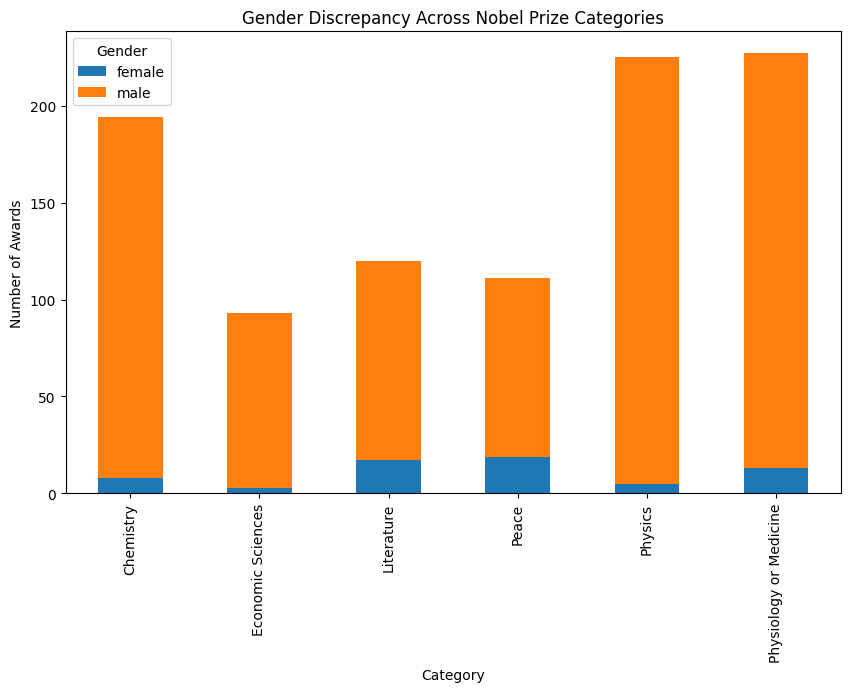

In [189]:
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Gender Discrepancy Across Nobel Prize Categories')
plt.xlabel('Category')
plt.ylabel('Number of Awards')
plt.legend(title='Gender')

plt.show()

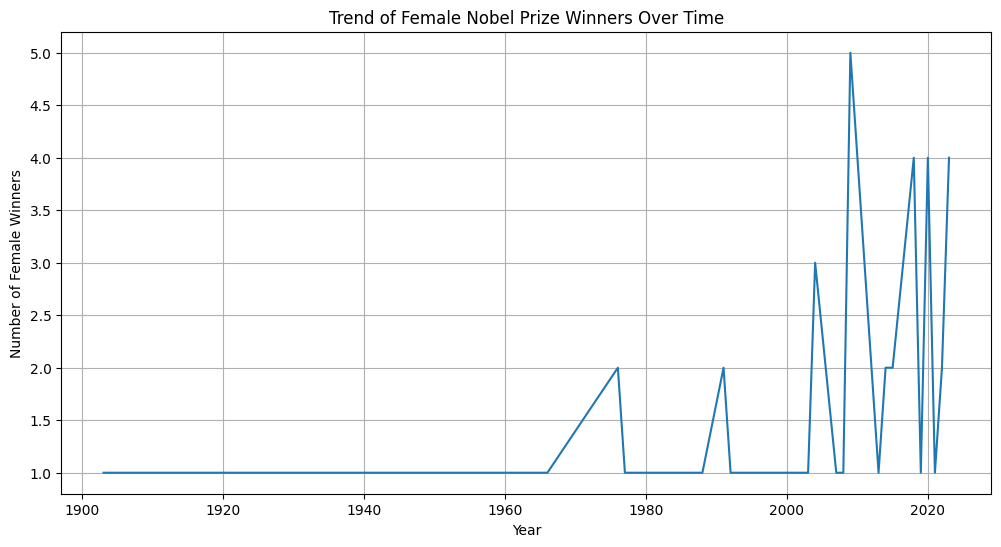

In [190]:
female_winners = df[df['Gender'] == 'female']

female_winners_per_year = female_winners.groupby('Award Year')['Laureate Name'].count()

plt.figure(figsize=(12, 6))
female_winners_per_year.plot(kind='line')
plt.title('Trend of Female Nobel Prize Winners Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Female Winners')
plt.grid(True)
plt.show()

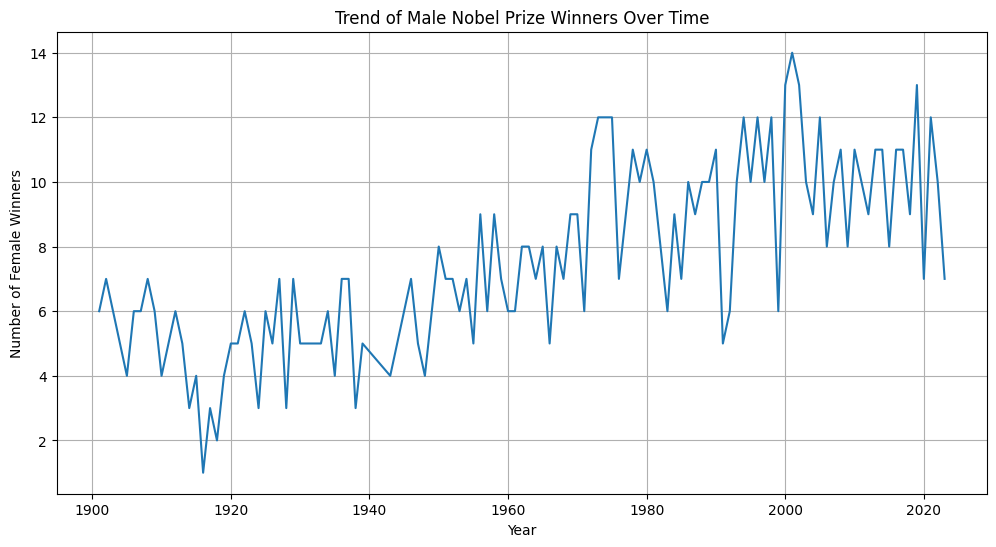

In [197]:
male_winners = df[df['Gender'] == 'male']

male_winners_per_year = male_winners.groupby('Award Year')['Laureate Name'].count()

plt.figure(figsize=(12, 6))
male_winners_per_year.plot(kind='line')
plt.title('Trend of Male Nobel Prize Winners Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Female Winners')
plt.grid(True)
plt.show()

In [198]:
female_winners_by_category = female_winners.groupby('Category')['Laureate Name'].count()

In [202]:
male_winners_by_category = male_winners.groupby('Category')['Laureate Name'].count()

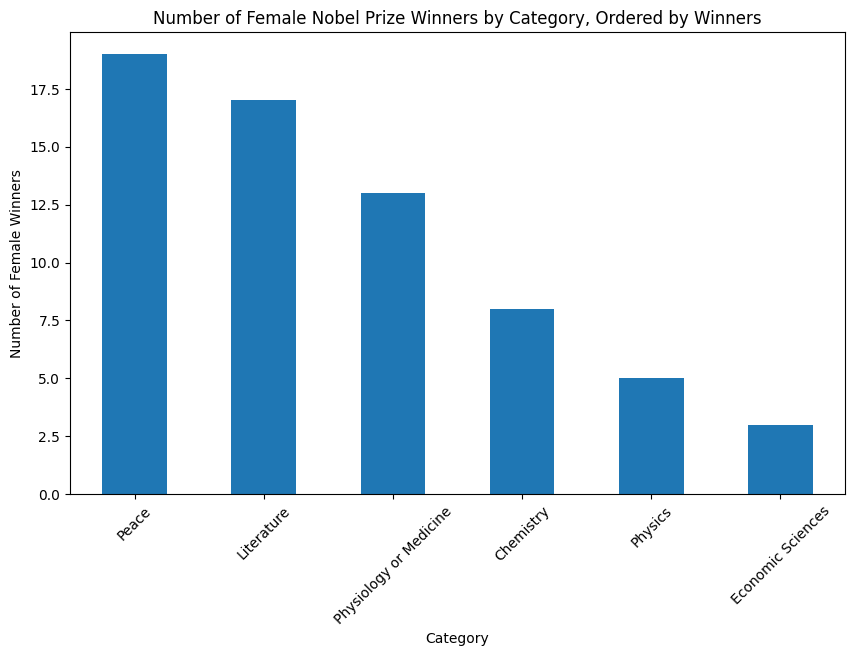

In [203]:
sorted_female_winners_by_category = female_winners_by_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_female_winners_by_category.plot(kind='bar')
plt.title('Number of Female Nobel Prize Winners by Category, Ordered by Winners')
plt.xlabel('Category')
plt.ylabel('Number of Female Winners')
plt.xticks(rotation=45)
plt.show()

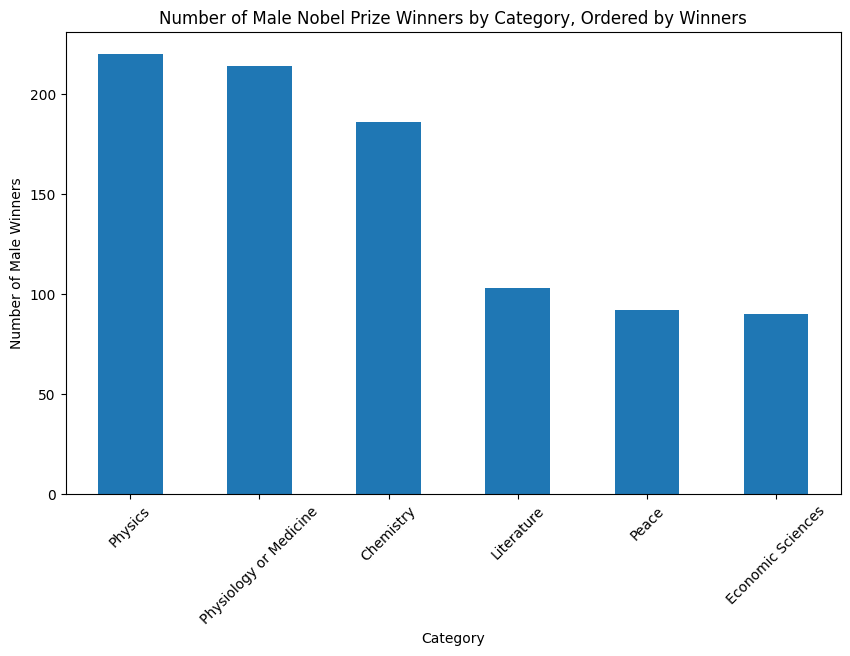

In [205]:
sorted_male_winners_by_category = male_winners_by_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_male_winners_by_category.plot(kind='bar')
plt.title('Number of Male Nobel Prize Winners by Category, Ordered by Winners')
plt.xlabel('Category')
plt.ylabel('Number of Male Winners')
plt.xticks(rotation=45)
plt.show()

In [194]:
pio.renderers.default = 'iframe_connected'

winners_per_country = df['Birth Country'].value_counts().reset_index()
winners_per_country.columns = ['Country', 'Total Winners']

fig = px.choropleth(winners_per_country,
                    locations="Country", 
                    locationmode="country names",
                    color="Total Winners", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global Nobel Prize Winners by Country")
fig.show()

In [201]:
category = st.selectbox('Select a Nobel Prize Category:', df['Category'].unique())

# Filter the DataFrame based on the selected category
filtered_df = df[df['Category'] == category]

# Perform some analysis or generate plots based on `filtered_df`
# For instance, showing the gender distribution within the selected category
gender_counts = filtered_df['Gender'].value_counts()
fig = px.bar(gender_counts, title=f'Gender Distribution in {category}')
st.plotly_chart(fig)

2024-03-06 17:50:01.597 
  command:

    streamlit run C:\Users\vborg\Documents\IronHack\Class\Week3\Project\Myproject\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()